# STA130 Week 06 Homework

**Name:** Varak Tanashian

**Date:** Novemebr 7th, 2024

**Assignment:** Week 06 Homework

---

## Course Information
- **Course:** STA130 - An Introduction to Statistical Reasoning and Data Science
- **Instructor:** Prof. Scott Schwartz 
- **Term:** Fall 2024

---

*This notebook contains my solutions and work for the Week 07 Homework assignment. The required Chatbot logs are included as well*

##### ChatGPT Summary: Found at the bottom of this notebook  
##### Chat Link
- https://chatgpt.com/share/672d6814-6990-800a-810f-5b83db5f80d3

In Simple Linear Regression (SLR), we are trying to model the relationship between two variables: one **dependent** (or outcome) variable, denoted by 𝑦, and one **independent** (or predictor) variable, denoted by 𝑥. 
The model assumes that there is a linear relationship between these two variables, which can be represented by the following equation:

𝑦<sub>𝑖</sub> = 𝛽 <sub>0</sub> + 𝛽<sub>1</sub> 𝑥<sub>𝑖</sub> + 𝜖<sub>𝑖</sub>
 
Where:

- 𝑦 <sub>𝑖</sub>  is the dependent variable (outcome) for the 𝑖-th observation.

- 𝑥<sub>𝑖</sub>   is the independent variable (predictor) for the 𝑖-th observation.

- 𝛽<sub>0</sub>  is the intercept, which represents the value of 𝑦 when 𝑥 = 0

- 𝛽<sub>1</sub>  is the slope coefficient, which represents the change in 𝑦 for a one-unit increase in 𝑥

- 𝜖<sub>𝑖</sub>   is the error term or residual, which captures all the variability in 𝑦 that cannot be explained by the linear relationship with 𝑥


### Components of the Model:
1. ** Predictor and Outcome Variables: **

The predictor variable x is usually the independent variable that we are using to predict the outcome variable y.
The outcome variable y depends on x, and the goal is to estimate the relationship between x and y.

2. **Slope (𝛽<sub>1</sub>) and Intercept (𝛽<sub>0</sub>):**

- **Slope** (𝛽<sub>1</sub>): The slope tells you how much y changes for each unit increase in x. 
  - If 𝛽<sub>1</sub>   is positive, y increases as x increases. 
  - If 𝛽<sub>1</sub>   is negative, y decreases as x increases.

- **Intercept (𝛽<sub>0</sub>)**: The intercept is the value of y when x = 0. It represents the starting point of the regression line.

3. **Error Term (𝜖<sub>𝑖</sub>):**

- The error term represents the random variation or noise in the data that is not explained by the linear relationship between x and y. It is assumed to be normally distributed with a mean of zero and a constant variance (homoscedasticity).

### How These Components Combine to Form a Sample from a Normal Distribution
The outcome y<sub>i</sub> for each observation is generated by the linear relationship 𝛽<sub>0</sub> + 𝛽<sub>1</sub>𝑥<sub>𝑖</sub>  plus the error term 𝜖<sub>𝑖</sub>.
If we assume that the error terms 𝜖<sub>𝑖</sub>  are independent and identically distributed (i.i.d.) with a normal distribution, then the outcome variable y<sub>𝑖</sub>  will also follow a normal distribution (for fixed 𝑥<sub>𝑖</sub>).

This means that, for each 𝑥<sub>𝑖</sub>, the value of 𝑦<sub>𝑖</sub>  will be normally distributed with the mean 𝛽<sub>0</sub> + 𝛽<sub>1</sub>𝑥<sub>𝑖</sub>  and some variance 𝜎<sup>2</sup>, representing the variance of the error term.

In summary:

𝑦<sub>𝑖</sub> ∼ 𝑁(𝛽<sub>0</sub> + 𝛽<sub>1</sub>𝑥<sub>𝑖</sub>𝜎<sup>2</sup>)


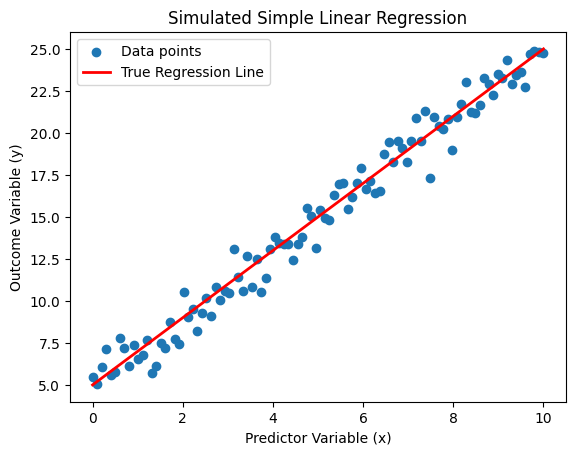

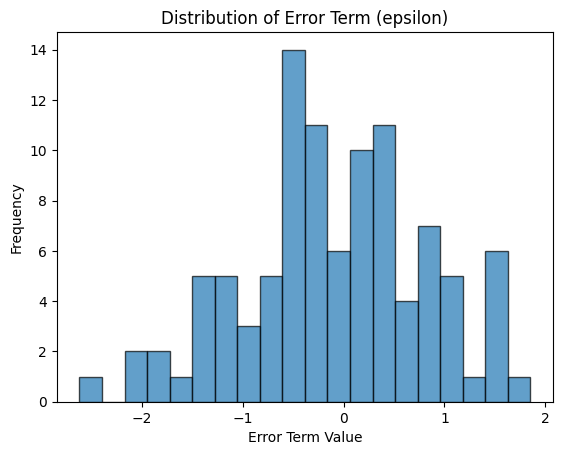

Sampled y for x=5: 13.584629257949587


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters of the linear model
beta_0 = 5       # Intercept
beta_1 = 2       # Slope
sigma = 1        # Standard deviation of the error term

# Generate the predictor variable (independent variable) x
n = 100           # Number of data points
x = np.linspace(0, 10, n)  # 100 points evenly spaced between 0 and 10

# Generate the error term epsilon, assumed to be normally distributed
epsilon = np.random.normal(0, sigma, size=n)

# Calculate the outcome variable y based on the simple linear regression equation
y = beta_0 + beta_1 * x + epsilon

# Plot the generated data
plt.scatter(x, y, label="Data points")
plt.plot(x, beta_0 + beta_1 * x, color='red', label="True Regression Line", linewidth=2)
plt.xlabel("Predictor Variable (x)")
plt.ylabel("Outcome Variable (y)")
plt.title("Simulated Simple Linear Regression")
plt.legend()
plt.show(renderer="png")

# Check the distribution of errors (epsilon)
plt.hist(epsilon, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Error Term (epsilon)")
plt.xlabel("Error Term Value")
plt.ylabel("Frequency")
plt.show(renderer="png")

# Example of sampling from the normal distribution (for one data point)
sample_y = stats.norm.rvs(loc=beta_0 + beta_1 * 5, scale=sigma)  # Predict y for x=5
print(f"Sampled y for x=5: {sample_y}")


### Question 2

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1270.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           6.76e-58
Time:                        19:20:58   Log-Likelihood:                -210.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      98   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4443      0.387     14.083      0.0

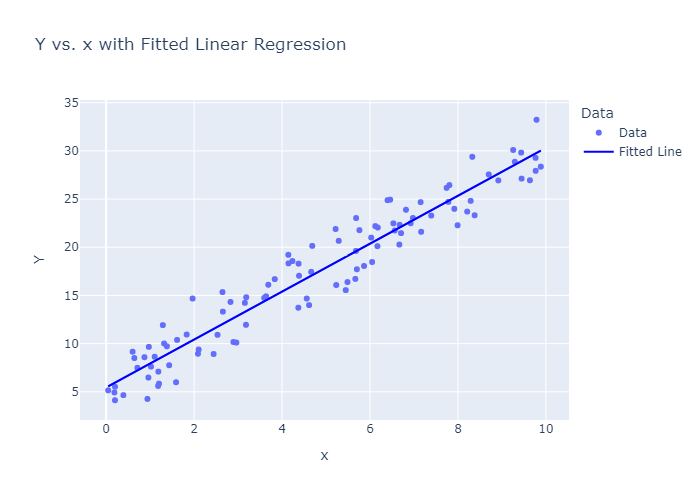

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # what is this library for?
import plotly.express as px  # this is a plotting library

# Answer: `statsmodels.formula.api` is used for specifying statistical models using formulas. 
# It allows us to fit Ordinary Least Squares (OLS) regression models conveniently using R-style formulas.

# Step 1: Simulate data for Simple Linear Regression
np.random.seed(0)  # Ensuring reproducibility
n = 100
x = np.random.rand(n) * 10  # Predictor variable (random values between 0 and 10)
true_slope = 2.5
true_intercept = 5
noise = np.random.randn(n) * 2  # Adding some noise
Y = true_intercept + true_slope * x + noise  # Response variable

# Step 2: Create DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 3: Fit the Simple Linear Regression Model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Answer: 
# `model_data_specification = smf.ols("Y~x", data=df)` specifies the OLS regression model with response Y and predictor x.
# `fitted_model = model_data_specification.fit()` fits the model to the data, estimating the coefficients.

# Step 4: Interpretation of Fitted Model
summary = fitted_model.summary()  # Provides comprehensive details about the fitted model
print(summary)

# Answer:
# `fitted_model.summary()` returns a detailed summary of the regression analysis, 
# including statistics like R-squared, coefficients, p-values, and standard errors.

params_table = fitted_model.summary().tables[1]
print(params_table)

# Answer:
# `fitted_model.summary().tables[1]` returns a specific table from the model summary, 
# which contains estimated coefficients (slope and intercept), their standard errors, t-statistics, and p-values.

params = fitted_model.params
print(params)

# Answer:
# `fitted_model.params` returns a pandas Series with the estimated coefficients (intercept and slope).

params_values = fitted_model.params.values
print(params_values)

# Answer:
# `fitted_model.params.values` gives the actual numerical values of the coefficients as a NumPy array.

r_squared = fitted_model.rsquared
print(r_squared)

# Answer:
# `fitted_model.rsquared` returns the R-squared value, which indicates the proportion of variance in the response variable 
# that is explained by the predictor variable.

# Step 5: Visualize the Fitted Model
# Adding a column to the DataFrame for legend purposes
df['Data'] = 'Data'  # Hack to add a label for the scatter plot legend

fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x with Fitted Linear Regression')

# Answer: `trendline='ols'` automatically fits and visualizes the OLS regression line on the scatter plot.

# Manually adding the fitted trendline to the figure
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Fitted Line")

# Display the figure
fig.show(renderer="png")  # Use this for GitHub and MarkUs submissions


### Question 3

In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import plotly.express as px

# Parameters of the linear model (from Question 1)
beta0 = 5       # Intercept
beta1 = 2       # Slope
sigma = 1       # Standard deviation of the error term

# Generate predictor variable (x) and response variable (Y)
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
epsilon = np.random.normal(0, sigma, size=n)
Y = beta0 + beta1 * x + epsilon

# Combine x and Y into a DataFrame
df = pd.DataFrame({"x": x, "Y": Y})

# Fitting a Simple Linear Regression model using statsmodels (from Question 2)
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Create scatter plot using Plotly Express
df['Data'] = 'Data'  # Hack to add data to the legend
fig = px.scatter(df, x='x', y='Y', color='Data', title='Theoretical vs Fitted Regression Line Comparison')

# Adding the theoretical line (from Question 1)
x_range = np.array([df['x'].min(), df['x'].max()])
y_theoretical = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_theoretical, mode='lines',
                name="Theoretical Line (5 + 2x)", 
                line=dict(dash='dot', color='orange'))

# Adding the fitted line (from Question 2)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Fitted Regression Line (OLS)")

# Display the plot
fig.show(renderer="png")


The theoretical line and the fitted regression line are very similar, meaning that the prediction is accurate

### Question 4

The `fitted_model.fittedvalues` are derived using the estimated coefficients from `fitted_model.params`, which contain the intercept and slope of the fitted linear regression model. These coefficients are calculated from the data during model fitting. Specifically, the intercept (β̂₀) and slope (β̂₁) are used in the equation ȳᵢ = β̂₀ + β̂₁ ⋅ xᵢ to calculate the predicted (fitted) values for each observation. The `fitted_model.summary().tables[1]` provides a detailed statistical summary, including these coefficient estimates along with their standard errors, t-statistics, and p-values. The fitted values are computed for each data point by multiplying the predictor value xᵢ by the estimated slope and adding the intercept. This process ensures that the fitted values represent the predicted outcomes based on the linear relationship established by the model.


### Question 5

Ordinary Least Squares (OLS) is a method that identifies the optimal line through data points by minimizing the sum of squared residuals. Residuals are the vertical distances between each data point and the fitted line.
The squares of these distances are used because:

1. Squaring converts negative distances to positive values
2. Squaring gives more weight to larger errors

When a point lies 2 units from the line, its squared error equals 4. At 3 units distance, the squared error becomes 9. This squared relationship means that large deviations are penalized more heavily than small ones.
The line producing the smallest possible sum of squared residuals is the OLS regression line - mathematically proven to be the optimal linear fit for the data. This mathematical foundation makes OLS the standard method for fitting linear relationships.

### Question 6


### Explanation of Proportion of Variation in \( Y \) Explained by the Model

1. **Expression 1**:
   \[
   1 - \frac{\sum (Y - \text{fitted\_model.fittedvalues})^2}{\sum (Y - Y.\text{mean()})^2}
   \]
   - **Numerator**: Sum of squared residuals (errors) → measures the **unexplained variation** in \( Y \).
   - **Denominator**: Total sum of squares → measures the **total variation** in \( Y \).
   - **Interpretation**: This fraction represents the **proportion of unexplained variation**.
   - \( 1 - \text{fraction} \) = **Proportion of variation explained by the model** (\( R^2 \)).

2. **`fitted_model.rsquared`**:
   - Directly calculated \( R^2 \) from the regression model.
   - Measures the **accuracy of the model** in explaining the variation in \( Y \).
   - \( R^2 \) ranges from 0 (no explanation) to 1 (full explanation).

3. **`np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2`**:
   - Calculates the **correlation** between actual \( Y \) and predicted \( Y \).
   - **Square of the correlation** gives \( R^2 \).
   - Shows how well the predictions match the actual values.

4. **`np.corrcoef(Y, x)[0,1]**2`**:
   - Calculates the **correlation** between \( Y \) and predictor \( x \).
   - **Square of the correlation** also equals \( R^2 \).
   - Measures how well the predictor \( x \) explains the variation in \( Y \).

### Summary Table

| Expression | Meaning | Interpretation |
|------------|---------|----------------|
| \(1 - \frac{\sum (Y - \text{fitted\_model.fittedvalues})^2}{\sum (Y - Y.\text{mean()})^2}\) | Proportion of variance explained | Shows \( R^2 \), the model's explanatory power |
| `fitted_model.rsquared` | \( R^2 \) value | Direct measure of model accuracy |
| `np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2` | Correlation between \( Y \) and predictions | Measures fit of predictions to actual data |
| `np.corrcoef(Y, x)[0,1]**2` | Correlation between \( Y \) and \( x \) | Reflects how well \( x \) explains \( Y \) |



### Question 7

The Simple Linear Regression model makes several key assumptions, some of which may not be compatible with the example data provided. A couple of assumptions that appear to be violated in this case are:

- The model assumes a linear relationship between the independent variable (amount of fertilizer) and the dependent variable (crop yield). However, the scatter plot of the data suggests that the relationship might not be perfectly linear, as the crop yield seems to accelerate as the amount of fertilizer increases. This indicates potential non-linearity, such as a curvilinear trend, which the linear model might not capture well.

- The model assumes that the spread of errors (the differences between the actual and predicted values) is roughly the same at all levels of the independent variable (in this case, the amount of fertilizer). If the errors are more spread out at higher values of fertilizer and less spread out at lower values, this would suggest that the model isn't behaving consistently across the range of data. This issue can make the model's predictions less reliable, especially for higher values of fertilizer.

These violations could affect the accuracy of the model's predictions and the validity of statistical tests (e.g., t-tests) based on the regression output.

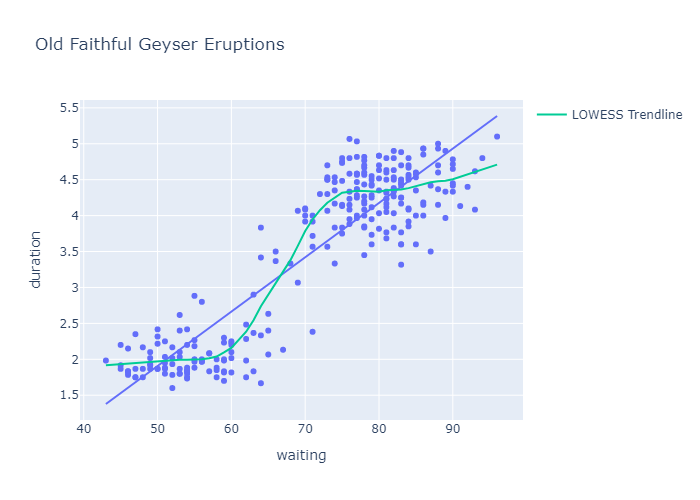

In [12]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

### Question 8

Hypothesis Testing for Linear Association in the Old Faithful Geyser Dataset
To test for a linear relationship between waiting time and eruption duration, we set up the following hypotheses:

- Null Hypothesis (H₀): There is no linear association between waiting time and eruption duration, meaning the slope of the regression line is zero (𝛽<sub>1</sub> = 0).

- Alternative Hypothesis (H₁): There is a linear association, meaning the slope of the regression line is not zero (𝛽<sub>1</sub> ≠ 0).

Using the regression model, we check the p-value for the slope coefficient. If the p-value is less than 0.05, we reject the null hypothesis, meaning there is strong evidence of a linear relationship. If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis, suggesting there is no significant evidence of a linear relationship.

The code above shows that the alternative hypothesis H₁ is decently accurate.


### Question 9

In [ ]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 61 # 99 # 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

# fig.show(renderer="png")
# fig.show(renderer="png")

NameError: name 'old_faithful' is not defined

: 

### Question 10

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define long wait times and extract data
long_wait_limit = 62
long_wait = old_faithful.waiting >= long_wait_limit
long_wait_data = old_faithful[long_wait]

# Step 1: Bootstrap Analysis
n_bootstrap = 1000
bootstrap_slopes = []

for _ in range(n_bootstrap):
    bootstrap_sample = long_wait_data.sample(n=len(long_wait_data), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample)
    fitted_model = model.fit()
    bootstrap_slopes.append(fitted_model.params['waiting'])

# Step 2: Null Hypothesis Simulations
n = 160
beta_0 = 1.65
beta_1 = 0
sigma = 0.37
n_simulations = 1000
simulated_slopes = []

for _ in range(n_simulations):
    # Randomly sample n waiting times from the original data
    waiting_values = np.random.choice(long_wait_data['waiting'].values, size=n, replace=True)
    
    # Simulate Y-values under null hypothesis
    y_simulated = beta_0 + beta_1 * waiting_values + np.random.normal(scale=sigma, size=n)
    sim_data = pd.DataFrame({'waiting': waiting_values, 'duration': y_simulated})
    
    # Fit model and collect slope
    sim_model = smf.ols('duration ~ waiting', data=sim_data).fit()
    simulated_slopes.append(sim_model.params['waiting'])

# Create improved visualizations using subplots
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Bootstrap Sampling Distribution',
                                  'Null Hypothesis Sampling Distribution'))

# Bootstrap distribution plot
fig.add_trace(
    go.Histogram(x=bootstrap_slopes, 
                 name='Bootstrap',
                 histnorm='probability density',
                 nbinsx=30),
    row=1, col=1
)

# Null hypothesis distribution plot
fig.add_trace(
    go.Histogram(x=simulated_slopes, 
                 name='Null Hypothesis',
                 histnorm='probability density',
                 nbinsx=30),
    row=1, col=2
)

# Add vertical line at 0 for reference
fig.add_vline(x=0, line_dash="dash", line_color="red", row=1, col=1)
fig.add_vline(x=0, line_dash="dash", line_color="red", row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Sampling Distributions of Slope Coefficients",
    showlegend=True,
    height=500,
    width=1000
)

fig.update_xaxes(title_text="Slope Coefficient Value", row=1, col=1)
fig.update_xaxes(title_text="Slope Coefficient Value", row=1, col=2)
fig.update_yaxes(title_text="Density", row=1, col=1)
fig.update_yaxes(title_text="Density", row=1, col=2)

fig.show(renderer="png")

# Calculate and report statistical measures
bootstrap_ci = np.percentile(bootstrap_slopes, [2.5, 97.5])
print(f"\n95% Bootstrap CI: [{bootstrap_ci[0]:.4f}, {bootstrap_ci[1]:.4f}]")
print(f"Contains zero: {(bootstrap_ci[0] <= 0 <= bootstrap_ci[1])}")

# Compare with original model p-value
original_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
original_p = original_model.pvalues['waiting']  # This is the corrected line
print(f"\nOriginal model p-value: {original_p:.4f}")

# Calculate simulated p-value
observed_slope = original_model.params['waiting']
simulated_p = np.mean(np.abs(simulated_slopes) >= np.abs(observed_slope))
print(f"Simulated p-value: {simulated_p:.4f}")



95% Bootstrap CI: [0.0457, 0.0749]
Contains zero: False

Original model p-value: 0.0000
Simulated p-value: 0.0000


### Question 11

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px

# Load Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Create indicator variable for wait time length
# Using 68 as the threshold as specified
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Fit the indicator variable model
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display model summary
print(model.summary().tables[1])

# Create visualization
fig = px.box(old_faithful, 
             x='kind', 
             y='duration',
             title='Duration ~ Kind',
             category_orders={'kind': ['short', 'long']})
# fig.show()
fig.show(renderer="png")

                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.0943      0.041     50.752      0.000       2.013       2.176
C(kind, Treatment(reference="short"))[T.long]     2.2036      0.052     42.464      0.000       2.101       2.306


The evidence against the null hypothesis of "no difference between groups on average" is very strong:

- The t-statistic is large (42.464)
- The p-value is effectively zero (0.000)
- The confidence interval for the difference excludes zero by a wide margin

### Question 12

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

NameError: name 'short_wait' is not defined

The first one

### Question 13

### **A) Permutation Test**

1. **What it does:** 
   - The permutation test checks if the difference between short and long wait groups is due to random chance. 
   - It randomly shuffles the labels of the two groups (short vs. long) and calculates the difference in means for each shuffle.
   - This is repeated many times to create a distribution of differences under the null hypothesis (no real difference).
   - The p-value is the proportion of times the shuffled difference is as extreme or more extreme than the observed difference.

2. **Interpretation:** 
   - If the p-value is small (e.g., less than 0.05), we reject the null hypothesis, suggesting the difference is not due to random chance.

---

### **B) Bootstrap Confidence Interval**

1. **What it does:** 
   - The bootstrap method resamples the data with replacement to create new samples.
   - For each sample, the mean difference between the short and long wait times is calculated.
   - After repeating this process many times, a confidence interval is created using the 2.5th and 97.5th percentiles of these mean differences.

2. **Interpretation:** 
   - The 95% confidence interval tells us the range within which the true mean difference likely lies. If the interval includes 0, it suggests no significant difference between the groups.

---

### **(a) Sampling Approaches:**

- **Permutation Test**: Tests the null hypothesis by shuffling group labels and seeing how likely the observed difference is under random reshuffling.
- **Bootstrap**: Builds a distribution of mean differences by resampling from the data itself, without assuming any specific model.

---

### **(b) Comparison with the Indicator Model from Question 11:**

- **Permutation vs. Indicator Model**: 
  - Both compare groups, but the permutation test shuffles labels to test randomness, while the indicator model uses a variable to differentiate between the groups.
  
- **Bootstrap vs. Indicator Model**: 
  - The bootstrap resamples data to estimate the uncertainty of the mean difference, while the indicator model estimates the difference using a regression model. The bootstrap doesn’t assume a specific model, while the indicator model does.

### Question 14

No


---

### Chatbot Summaries

##### **Summary of the Conversation So Far**

1. **Simple Linear Regression Analysis of the Old Faithful Dataset**:
   - Explored relationships between eruption duration and waiting time.
   - Code examples included using `plotly` for scatter plots with trendlines and fitting regression models with `statsmodels`.
   
2. **Hypothesis Testing**:
   - Hypothesis testing on the relationship between `duration` and `waiting`.
   - Null hypothesis: no linear association between waiting time and eruption duration.
   - p-value interpretation based on regression results (`summary()` table) and the `rsquared` value.

3. **Resampling and Bootstrapping**:
   - **Bootstrap Sampling Distribution**:
     - Collected slope coefficients from bootstrapped samples and visualized their distribution.
     - Simulated data based on assumed values for testing hypotheses under the null hypothesis (no linear relationship).
   
4. **Testing with Short vs. Long Wait Times**:
   - Subset data to investigate relationships between `waiting` and `duration` for short wait times (less than a threshold).
   - Applied regression models to these subsets and examined whether the relationship held in different data segments (short vs. full dataset).

5. **Residuals and Diagnostics**:
   - Discussed histograms of residuals for different models, comparing the distributions and assessing the normality assumption for error terms.
   - Visualized and compared residuals with a normal distribution overlay for various models (full data, short wait data, long wait data, and indicator models).

6. **Permutation and Bootstrap Tests**:
   - **Permutation Test**:
     - Shuffled group labels to test if differences in mean duration between short and long wait times were due to random chance.
     - Used the resulting distribution of differences to compute a p-value.
   - **Bootstrap Confidence Interval**:
     - Repeatedly resampled data from short and long wait groups to create a confidence interval for the difference in means.
     - Evaluated if the interval contained 0 to assess significance.

7. **Comparison of Methods**:
   - **Permutation Test**: Assesses randomness by shuffling group labels.
   - **Bootstrap**: Creates sampling distributions via repeated resampling with replacement.
   - **Indicator Variable Model** (from Question 11): Provides a regression-based approach to assess group differences, but relies on a model assumption.

This summary includes key points from the discussion about data visualization, hypothesis testing, regression modeling, bootstrapping, permutation tests, and diagnostic assessments for the Old Faithful dataset.